*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [41]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## Reading data
The data is read from the CSV file and its head is displayed

In [42]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Categorical to Numerical Conversion
Make sure to convert categorical data to numbers. The categorical features are the ones having type "object"

In [43]:
# Reference: https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html
# Reference: https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/

from sklearn.compose import make_column_selector as selector

# The datatype of categorical features is "object"
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(dataset)

for a_column in categorical_columns:
    unique_vals = dataset[a_column].unique().tolist()
    numeric_mappings = list(range(0,len(unique_vals)))
    
    dataset[a_column].replace(unique_vals,
                              numeric_mappings,
                              inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


## Train and test split
Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

In [44]:
# Reference: https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_hands_on.html

from sklearn.model_selection import train_test_split

# First, separate the data and target
data  = dataset.drop(columns="expenses") 
target = dataset["expenses"]

# The train_test_split function from SCIKITLEARN does the 
# trick. I saved the random_state to reproduce the results
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42, test_size=0.2)

print(f"Number of samples in training set: {data_train.shape[0]} => "
      f"{data_train.shape[0] / dataset.shape[0] * 100:.1f}% of the"
      f" original dataset")

print(f"Number of samples in testing set: {data_test.shape[0]} => "
      f"{data_test.shape[0] / dataset.shape[0] * 100:.1f}% of the"
      f" original dataset")

Number of samples in training set: 1070 => 80.0% of the original dataset
Number of samples in testing set: 268 => 20.0% of the original dataset


## Define the model

In [45]:
# Reference: (Fot input shape) https://keras.io/api/layers/core_layers/dense/
model = keras.Sequential([
                            keras.Input(np.array(data_train).shape[1]),
                            layers.Dense(100),
                            layers.Dense(100),
                            layers.Dense(100),
                            layers.Dense(50),
                            layers.Dense(1),
                          ])
model.compile(loss='mae', 
              optimizer='adam',
              metrics = ['mae','mse']
              )
    
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               700       
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 50)                5050      
                                                                 
 dense_24 (Dense)            (None, 1)                 51        
                                                                 
Total params: 26,001
Trainable params: 26,001
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(
    data_train,
    target_train,
    epochs=1000,
    validation_split=0.5,
    verbose = 0
)

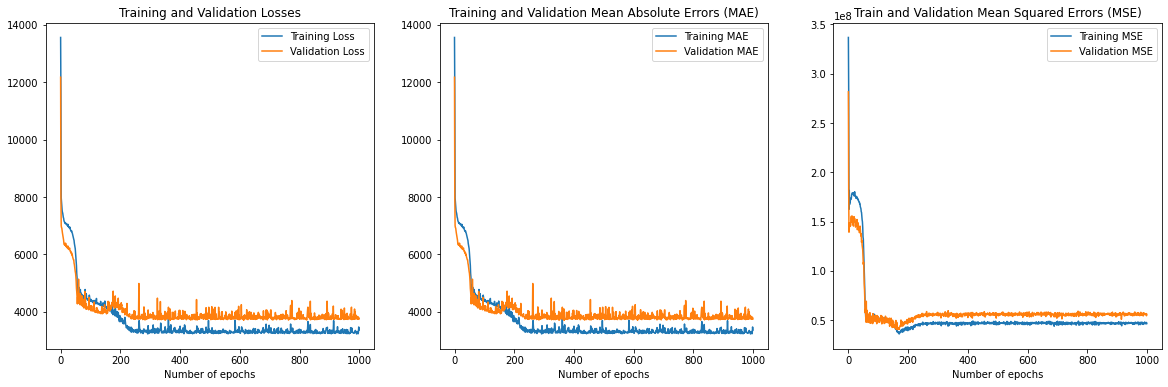

In [39]:
# history.history.keys()
# Training_results
train_loss = history.history['loss']
train_mae = history.history['mae']
train_mse = history.history['mse']

# validation_results
val_loss = history.history['val_loss']
val_mae = history.history['val_mae']
val_mse = history.history['val_mse']

# Epochs
epochs = 1000
epochs_range = range(epochs)
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Losses')
plt.xlabel("Number of epochs")

plt.subplot(1, 3, 2)
plt.plot(epochs_range, train_mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('Training and Validation Mean Absolute Errors (MAE)')
plt.xlabel("Number of epochs")

plt.subplot(1, 3, 3)
plt.plot(epochs_range, train_mse, label='Training MSE')
plt.plot(epochs_range, val_mse, label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Train and Validation Mean Squared Errors (MSE)')
plt.xlabel("Number of epochs")

plt.show()

9/9 - 0s - loss: 3207.0344 - mae: 3207.0344 - mse: 44810256.0000 - 21ms/epoch - 2ms/step
Testing set Mean Abs Error: 3207.03 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 730us/step


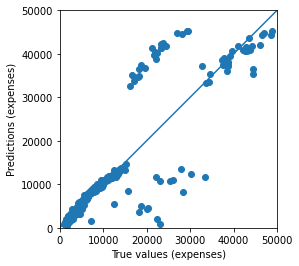

In [40]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(data_test, target_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(data_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(target_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
